In [ ]:
from google.colab import drive
drive.mount('/content/drive')

 Twitter_Data.csv loaded successfully!


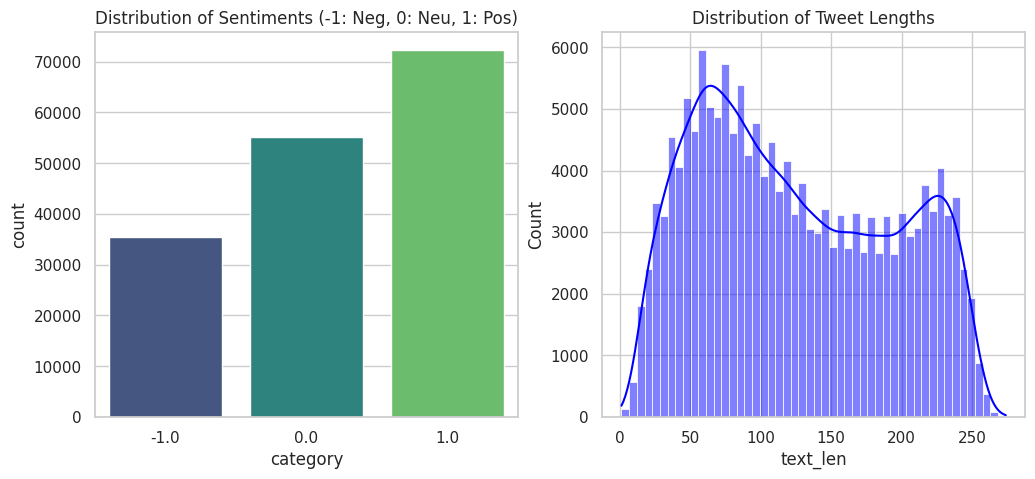


 SENTIMENT ANALYSIS PERFORMANCE
Accuracy Score: 84.31%

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.90      0.61      0.73      7152
         0.0       0.84      0.92      0.88     11067
         1.0       0.83      0.90      0.86     14375

    accuracy                           0.84     32594
   macro avg       0.86      0.81      0.82     32594
weighted avg       0.85      0.84      0.84     32594



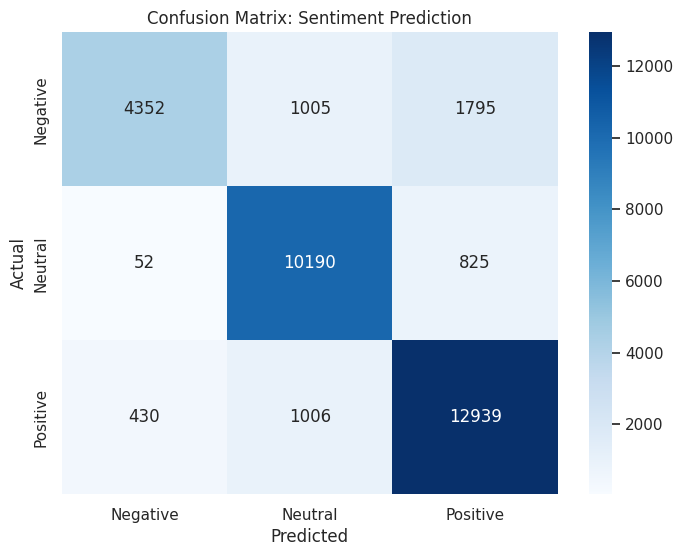


 Level 1 Sentiment Analysis Complete!


In [28]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

try:
    df = pd.read_csv('/content/sample_data/Twitter_Data.csv')
    print(" Twitter_Data.csv loaded successfully!")

    df.dropna(inplace=True)

except FileNotFoundError:
    print("Error: 'Twitter_Data.csv' not found. Please upload it to the sidebar.")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='category', data=df, palette='viridis')
plt.title('Distribution of Sentiments (-1: Neg, 0: Neu, 1: Pos)')

df['text_len'] = df['clean_text'].apply(len)
plt.subplot(1, 2, 2)
sns.histplot(df['text_len'], bins=50, color='blue', kde=True)
plt.title('Distribution of Tweet Lengths')
plt.show()

X = df['clean_text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("\n" + "="*40)
print(" SENTIMENT ANALYSIS PERFORMANCE")
print("="*40)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix: Sentiment Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\n Level 1 Sentiment Analysis Complete!")